importing important libraries

In [100]:
import networkx as nx                                                  
import matplotlib.pyplot as plt
import networkx.algorithms.community as nx_comm
import random
import numpy as np
from itertools import accumulate

reading the data set with nx.read_edgelist() function

In [101]:
G=nx.read_edgelist('email-Eu-core.txt')
print(nx.info(G))

Graph with 1005 nodes and 16706 edges


C:\Users\Arijit Kundu\AppData\Local\Temp\ipykernel_6172\2284331274.py:2: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  print(nx.info(G))


A copy of the graph is created and using nx_comm.louvain_communities(H) we get the communities in the Graph and it returns a set so we store it inside community_set

In [102]:
H=nx.Graph(G)
community_set = nx_comm.louvain_communities(H)
print("there is ",len(community_set),"communities in Facebook Dataset")
print(community_set)

there is  27 communities in Facebook Dataset
[{'39', '442', '23', '485', '655', '151', '133', '986', '895', '245', '757', '997', '318', '37', '547', '114', '93', '436', '953', '455', '261', '47', '28', '165', '987', '370', '26', '25', '437', '444', '816', '136', '964', '31', '900', '333', '439', '339', '686', '860', '119', '123', '135', '545', '34', '96', '785', '588', '171', '470', '38', '330', '980', '116', '883', '609', '220', '753', '76', '40', '36', '897', '169', '881', '35', '976', '75', '494', '115', '914', '409', '981', '27', '878', '113', '844', '32', '33', '925', '361', '251', '875', '367', '337', '170', '338', '48', '590', '847', '919', '527', '978', '983', '417', '30', '229', '427', '464', '795', '24', '263', '423', '721', '915', '438', '722', '725', '13', '443', '29', '336'}, {'381', '668', '347', '320', '384', '149', '882', '595', '449', '160', '387', '52', '157', '814', '680', '181', '414', '382', '948', '719', '906', '947', '156', '179', '295', '393', '150', '839', '943

here the list of set is converted into list of list and it is converted into list of list

In [103]:
community_list = []
for j in community_set:
    community_list.append(list(j))
print(community_list)

[['39', '442', '23', '485', '655', '151', '133', '986', '895', '245', '757', '997', '318', '37', '547', '114', '93', '436', '953', '455', '261', '47', '28', '165', '987', '370', '26', '25', '437', '444', '816', '136', '964', '31', '900', '333', '439', '339', '686', '860', '119', '123', '135', '545', '34', '96', '785', '588', '171', '470', '38', '330', '980', '116', '883', '609', '220', '753', '76', '40', '36', '897', '169', '881', '35', '976', '75', '494', '115', '914', '409', '981', '27', '878', '113', '844', '32', '33', '925', '361', '251', '875', '367', '337', '170', '338', '48', '590', '847', '919', '527', '978', '983', '417', '30', '229', '427', '464', '795', '24', '263', '423', '721', '915', '438', '722', '725', '13', '443', '29', '336'], ['381', '668', '347', '320', '384', '149', '882', '595', '449', '160', '387', '52', '157', '814', '680', '181', '414', '382', '948', '719', '906', '947', '156', '179', '295', '393', '150', '839', '943', '916', '377', '402', '368', '628', '53', '

K shell function is made to find out the community cores! cores at the end of the list are cores with higher degrees

In [104]:
def check(H,d):
    f = 0 
    for j in H:
        if (H.degree(j) <= d):
            f = 1
            break
    return f
  
def find_nodes(H, it):
    set1 = []
    for j in H:
        if (H.degree(j) <= it):
            set1.append(j)
    return set1
  
def k_shell(H):  
    it = 1
    tmp = []
    buckets = []
    while (1):
        flag = check(H, it)
        if (flag == 0):
            it += 1
            buckets.append(tmp)
            tmp = []
        if (flag == 1):
            node_set = find_nodes(H, it)
            for each in node_set:
                copy_graph.remove_node(each)
                tmp.append(each)
        if (H.number_of_nodes() == 0):
            buckets.append(tmp)
            return buckets
            break
               

here k-shell is applied and the community list of list is stored into list_core

In [105]:
copy_graph = nx.Graph(H)
list_core = []
k_com = nx.Graph()
other_com = nx.Graph()
for i in community_list:
    k_com = copy_graph.subgraph(i)
    k_core=k_shell(k_com)
    list_core.append((k_core))
print(list_core)

[[['897', '881', '795', '875', '915'], ['986', '844'], ['997', '436', '983', '722', '895', '439', '686'], ['964', '785', '757', '878'], ['330', '978'], ['609'], ['220', '721'], [], ['980'], ['953'], ['987'], ['119', '883', '919', '725'], [], [], ['527'], ['753', '816'], ['470', '75', '229', '655', '900', '914', '925', '123', '860'], [], ['76', '464', '588', '545', '494'], ['427', '485'], ['976', '981', '847', '444', '442', '423'], ['590', '336', '547'], ['136', '337', '25', '133'], ['245', '37', '93', '34', '318', '171', '33', '24', '370', '36', '409', '263', '47', '26', '31', '135', '169', '338', '13', '39', '333', '32', '48', '443', '455', '261', '28', '40', '35', '115', '361', '170', '30', '23', '151', '114', '437', '339', '96', '38', '27', '113', '251', '367', '417', '29', '438', '165', '116']], [['668', '882', '449', '680', '948', '943', '916', '985', '821', '961', '595', '839', '724', '868', '959', '603', '761', '781', '904', '960'], ['906', '539'], ['736', '659'], ['414', '398',

storing the cores with Higher degree in a list called k_core_list and also the lengths of the cores are stored inside leng list

In [106]:
k_core_list = []
leng=[];
for i in list_core:
    length = len(i)-1
    k_core_list.append(i[length])       

for i in k_core_list:
    leng.append(len(i))

print(k_core_list)    
print(leng)

[['245', '37', '93', '34', '318', '171', '33', '24', '370', '36', '409', '263', '47', '26', '31', '135', '169', '338', '13', '39', '333', '32', '48', '443', '455', '261', '28', '40', '35', '115', '361', '170', '30', '23', '151', '114', '437', '339', '96', '38', '27', '113', '251', '367', '417', '29', '438', '165', '116'], ['381', '179', '378', '380', '388', '385', '397', '160', '150', '395', '296', '320', '387', '394', '157', '181', '393', '368', '182', '61', '250', '60', '321', '389', '390', '295', '377', '103', '376', '379', '104'], ['69', '84', '155', '453', '509', '531', '612', '747', '188', '301', '363', '513', '615', '16', '189', '357', '490', '68', '153', '215', '221', '253', '356', '223', '314', '459', '80', '222', '473', '163', '226', '419', '420', '20', '154', '184', '300', '42', '74', '147', '152', '187', '495', '546', '932', '145', '173', '254', '255', '329', '340', '355', '366', '474', '17', '21', '62', '81', '82', '83', '87', '105', '106', '107', '121', '142', '166', '212

Defining a H_index function that returns H index of any list

In [107]:
def H_index(citations):
    citations.sort()
    for index, cited in enumerate(citations):
        result = len(citations) - index
        if result <= cited:
            return result
    return 0

defining a function that can return the H_index of any node's neighbours list's H_index

In [108]:
def Node_H_index(node):
    neig_list=G.neighbors(node)
    degree_list=[]
    for neighbour in neig_list:
        degree_list.append(G.degree(neighbour))
    h_index = H_index(degree_list)
    return h_index

defing a functiion that can return the Extended_h_index of a node

In [109]:
def Extended_H_index(node):
    h_index = Node_H_index(node)
    h_sum = 0
    for n in G.neighbors(node):
        h_sum = h_sum + Node_H_index(n)
    return h_index + h_sum

K core lists in every community and their extended H index

In [110]:
extended_list = []
new_extended_list=[]
rev_list=[]

for i in k_core_list:
    length=len(i)
    for j in i:
        extended_list.append(Extended_H_index(j))
print("K core list:",k_core_list)        
print("List of Extended H_index of cores:", extended_list )
new_extended_list = [extended_list[x - y: x] for x, y in zip(accumulate(leng), leng)]
print("Extended H_index of core_list:",new_extended_list)
print("Length of the cores in core_list:",leng)

K core list: [['245', '37', '93', '34', '318', '171', '33', '24', '370', '36', '409', '263', '47', '26', '31', '135', '169', '338', '13', '39', '333', '32', '48', '443', '455', '261', '28', '40', '35', '115', '361', '170', '30', '23', '151', '114', '437', '339', '96', '38', '27', '113', '251', '367', '417', '29', '438', '165', '116'], ['381', '179', '378', '380', '388', '385', '397', '160', '150', '395', '296', '320', '387', '394', '157', '181', '393', '368', '182', '61', '250', '60', '321', '389', '390', '295', '377', '103', '376', '379', '104'], ['69', '84', '155', '453', '509', '531', '612', '747', '188', '301', '363', '513', '615', '16', '189', '357', '490', '68', '153', '215', '221', '253', '356', '223', '314', '459', '80', '222', '473', '163', '226', '419', '420', '20', '154', '184', '300', '42', '74', '147', '152', '187', '495', '546', '932', '145', '173', '254', '255', '329', '340', '355', '366', '474', '17', '21', '62', '81', '82', '83', '87', '105', '106', '107', '121', '142'

Finding out max Extended h index values of the nodes and their indexes 

In [111]:
max_extended_h_index=[]
index_list=[]
for i in new_extended_list:
    max_extended_h_index.append(max(i))
    index_list.append(i.index(max(i)))

print("Maximum extended h indexes:",max_extended_h_index)
print("Their index value:",index_list)

Maximum extended h indexes: [6888, 12699, 10052, 2, 2, 3917, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1754, 2, 2, 2, 2, 2, 2, 6718, 2, 8362, 6432]
Their index value: [35, 7, 64, 0, 0, 13, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 0, 0, 0, 0, 0, 0, 27, 0, 15, 6]


Finally using the indexes we find out the cores

In [112]:
seed=[]
for x,y in zip(k_core_list,index_list):
    seed.append(x[y])
print(seed)

['114', '160', '121', '580', '633', '269', '648', '653', '658', '660', '670', '675', '684', '691', '703', '711', '482', '731', '732', '744', '746', '772', '798', '211', '808', '86', '533']


Coppying the cores in a new list for safety

In [113]:
copy_seeds=[]
copy_seeds=seed.copy()
print(copy_seeds)
print(len(copy_seeds))

['114', '160', '121', '580', '633', '269', '648', '653', '658', '660', '670', '675', '684', '691', '703', '711', '482', '731', '732', '744', '746', '772', '798', '211', '808', '86', '533']
27


In [114]:
my_dict={copy_seeds[i]: max_extended_h_index[i] for i in range(len(copy_seeds))}
# print(my_dict)
# print(my_dict.values())
sorted_dict={k: v for k,v in sorted(my_dict.items(), key = lambda v:v[1], reverse = True)}
print(sorted_dict)

{'160': 12699, '121': 10052, '86': 8362, '114': 6888, '211': 6718, '533': 6432, '269': 3917, '482': 1754, '580': 2, '633': 2, '648': 2, '653': 2, '658': 2, '660': 2, '670': 2, '675': 2, '684': 2, '691': 2, '703': 2, '711': 2, '731': 2, '732': 2, '744': 2, '746': 2, '772': 2, '798': 2, '808': 2}


In [115]:
def ic(G, s, act_prbo):    
    jst_inf = s
    infected = s
    
    while(1):
        
        if len(jst_inf)==0:
            return infected
        else:
            temp=[]
            for each in jst_inf:
                for each1 in G.neighbors(each):
                    r=random.uniform(0,1)
                    if r<act_prbo and each1 not in infected and each1 not in temp:
                        temp.append(each1)
            for each1 in temp:
                infected.append(each1)
            jst_inf=temp

In [116]:
print(ic(G,seed,0.5))

['114', '160', '121', '580', '633', '269', '648', '653', '658', '660', '670', '675', '684', '691', '703', '711', '482', '731', '732', '744', '746', '772', '798', '211', '808', '86', '533', '113', '155', '333', '361', '263', '165', '256', '365', '340', '245', '62', '28', '63', '47', '371', '208', '41', '48', '105', '210', '2', '137', '46', '115', '326', '128', '363', '212', '438', '486', '444', '547', '339', '133', '171', '76', '485', '254', '419', '168', '640', '83', '424', '686', '152', '81', '303', '355', '170', '280', '609', '366', '820', '96', '564', '220', '44', '362', '892', '89', '356', '234', '896', '13', '375', '35', '261', '971', '87', '919', '39', '983', '93', '420', '161', '23', '187', '405', '284', '18', '45', '321', '338', '314', '17', '42', '106', '478', '453', '495', '233', '135', '446', '380', '258', '557', '58', '217', '318', '401', '250', '323', '163', '130', '352', '127', '441', '748', '55', '290', '343', '641', '298', '342', '132', '78', '345', '184', '224', '84', 

In [117]:
print("Seed nodes",copy_seeds)
seed_neighbour_list=[]
for i in copy_seeds:
    neighbour_list = [n for n in H.neighbors(i)]
    seed_neighbour_list.append(neighbour_list)
print(seed_neighbour_list)

Seed nodes ['114', '160', '121', '580', '633', '269', '648', '653', '658', '660', '670', '675', '684', '691', '703', '711', '482', '731', '732', '744', '746', '772', '798', '211', '808', '86', '533']
[['2', '3', '4', '13', '21', '24', '28', '30', '35', '36', '39', '41', '44', '46', '47', '48', '51', '62', '63', '76', '78', '80', '81', '82', '83', '86', '87', '89', '93', '96', '105', '106', '107', '113', '155', '333', '361', '129', '263', '318', '165', '256', '365', '340', '417', '169', '527', '245', '283', '367', '371', '531', '208', '495', '210', '137', '278', '115', '326', '183', '128', '160', '363', '212', '438', '486', '444', '114', '423', '547', '339', '121', '133', '434', '171', '443', '442', '485', '166', '254', '419', '464', '168', '249', '329', '405', '290', '211', '226', '640', '229', '338', '455', '424', '686', '152', '767', '303', '355', '255', '170', '184', '307', '280', '609', '145', '366', '820', '725', '426', '564', '220', '362', '533', '172', '116', '847', '892', '655'

In [118]:
node_n_list=[]
for i in seed_neighbour_list:
    for j in i:
        
        node_n_list.append(j)
final_set=((set)(node_n_list))
final_list=list(final_set)
print(final_list)

['381', '139', '258', '350', '672', '658', '132', '261', '636', '206', '305', '393', '150', '67', '184', '512', '189', '435', '12', '726', '924', '118', '224', '395', '238', '46', '526', '404', '521', '61', '495', '426', '296', '161', '896', '68', '468', '281', '808', '177', '250', '125', '736', '454', '64', '91', '933', '642', '137', '857', '950', '56', '412', '338', '196', '419', '272', '273', '190', '365', '464', '389', '24', '777', '262', '746', '415', '92', '314', '285', '363', '215', '320', '473', '134', '812', '754', '442', '579', '963', '679', '895', '259', '287', '245', '493', '478', '547', '114', '623', '44', '720', '156', '197', '356', '444', '174', '373', '377', '63', '402', '10', '424', '280', '128', '686', '665', '342', '580', '96', '362', '571', '324', '153', '584', '127', '116', '604', '586', '220', '36', '832', '3', '107', '859', '308', '474', '54', '236', '810', '42', '88', '201', '392', '367', '428', '210', '57', '448', '379', '20', '732', '527', '104', '148', '97', 

In [119]:
# Node_list=H.nodes()
# rest_list=Node_list-final_list
# candidate_solution=list(rest_list)+copy_seeds
# candidate_solution = set(candidate_solution)
# # print(candidate_solution)
# candidate_solution = list(candidate_solution)
# # print(candidate_solution)
# print("Nodes left after deleting seed node's neighbours:",candidate_solution)
# print("Core number:",len(candidate_solution))

In [120]:
decending_seed_list=list(sorted_dict.keys())
adjustList = decending_seed_list.copy()
print(adjustList)
print(len(adjustList))
print(adjustList [0:10])

['160', '121', '86', '114', '211', '533', '269', '482', '580', '633', '648', '653', '658', '660', '670', '675', '684', '691', '703', '711', '731', '732', '744', '746', '772', '798', '808']
27
['160', '121', '86', '114', '211', '533', '269', '482', '580', '633']


In [121]:
def final_calculation(K):
    adjustList = decending_seed_list.copy()
    if K < len(community_list):
        decending_list = adjustList[0:K]
        print("Best ",len(decending_list)," are: ", decending_list)

        lenList=[]
        tempList=[]

        for i in range(20):
            tempList= ic(H,adjustList,0.5)
            print(i,end="-->")
            lenList.append(len(tempList))
        print("\n",lenList)

        average = sum(lenList)/len(lenList)
        return average
    
    else:
        candidateIndex_list = []
        for i in candidate_solution:
            candidateIndex_list.append(Extended_H_index(i))


        my_dict1={candidate_solution[i]: candidateIndex_list[i] for i in range(len(candidate_solution))}
        candidate_decending={k: v for k,v in sorted(my_dict1.items(), key = lambda v:v[1], reverse = True)}


        rest_nodes=list(candidate_decending.keys())
        temp3 = []
        for element in rest_nodes:
            if element not in adjustList:
                temp3.append(element)

        val = len(adjustList)
        op_list = adjustList + temp3[0 :(K - val)]

        print("Best ",len(op_list)," are: ", op_list)
        len1List=[]
        temp1List=[]

        for i in range(20):
            temp1List= ic(H,adjustList,0.5)
            print(i,end="-->")
            len1List.append(len(temp1List))
        print("\n",len1List)

        average1 = sum(len1List)/len(len1List)
        return average1

In [122]:
kList=[]

k1 = 10
k2 = 20
k3 = 30
k4 = 40
k5 = 50

kList.append(k1)
kList.append(k2)
kList.append(k3)
kList.append(k4)
kList.append(k5)

print(kList)

[10, 20, 30, 40, 50]


In [123]:
valueList = []

v1 = final_calculation(10)
v2 = final_calculation(20)
v3 = final_calculation(30)
v4 = final_calculation(40)
v5 = final_calculation(50)

valueList.append(v1)
valueList.append(v2)
valueList.append(v3)
valueList.append(v4)
valueList.append(v5)

print(valueList)

Best  10  are:  ['160', '121', '86', '114', '211', '533', '269', '482', '580', '633']
0-->1-->2-->3-->4-->5-->6-->7-->8-->9-->10-->11-->12-->13-->14-->15-->16-->17-->18-->19-->
 [938, 982, 995, 1001, 1003, 1005, 1005, 1005, 1005, 1005, 1005, 1005, 1005, 1005, 1005, 1005, 1005, 1005, 1005, 1005]
Best  20  are:  ['160', '121', '86', '114', '211', '533', '269', '482', '580', '633', '648', '653', '658', '660', '670', '675', '684', '691', '703', '711']
0-->1-->2-->3-->4-->5-->6-->7-->8-->9-->10-->11-->12-->13-->14-->15-->16-->17-->18-->19-->
 [932, 975, 993, 1000, 1000, 1002, 1002, 1003, 1004, 1004, 1005, 1005, 1005, 1005, 1005, 1005, 1005, 1005, 1005, 1005]
Best  30  are:  ['160', '121', '86', '114', '211', '533', '269', '482', '580', '633', '648', '653', '658', '660', '670', '675', '684', '691', '703', '711', '731', '732', '744', '746', '772', '798', '808', '183', '44', '409']
0-->1-->2-->3-->4-->5-->6-->7-->8-->9-->10-->11-->12-->13-->14-->15-->16-->17-->18-->19-->
 [945, 977, 1000, 1002

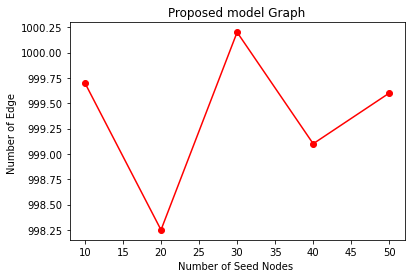

In [124]:
plt.plot(kList,valueList, 'ro-')
plt.xlabel('Number of Seed Nodes ')
plt.ylabel('Number of Edge ')
plt.title('Proposed model Graph')
plt.show()

Best  10  are:  ['160', '121', '82', '107', '86', '62', '434', '13', '166', '183']
0-->1-->2-->3-->4-->5-->6-->7-->8-->9-->10-->11-->12-->13-->14-->15-->16-->17-->18-->19-->
 [928, 968, 972, 980, 982, 983, 984, 985, 985, 986, 986, 986, 986, 986, 986, 986, 986, 986, 986, 986]
Best  20  are:  ['160', '121', '82', '107', '86', '62', '434', '13', '166', '183', '5', '64', '249', '129', '533', '211', '105', '128', '106', '114']
0-->1-->2-->3-->4-->5-->6-->7-->8-->9-->10-->11-->12-->13-->14-->15-->16-->17-->18-->19-->
 [933, 966, 975, 982, 985, 985, 985, 986, 986, 986, 986, 986, 986, 986, 986, 986, 986, 986, 986, 986]
Best  30  are:  ['160', '121', '82', '107', '86', '62', '434', '13', '166', '183', '5', '64', '249', '129', '533', '211', '105', '128', '106', '114', '283', '83', '142', '87', '377', '21', '420', '282', '333', '424']
0-->1-->2-->3-->4-->5-->6-->7-->8-->9-->10-->11-->12-->13-->14-->15-->16-->17-->18-->19-->
 [921, 961, 971, 982, 983, 984, 986, 986, 986, 986, 986, 986, 986, 986, 9

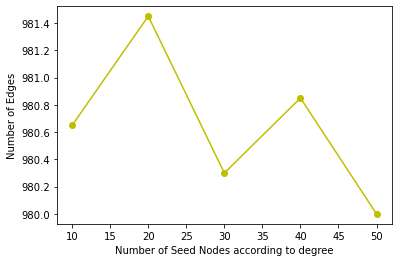

In [125]:
#Degree
degreeDict={}
for node in G.nodes():
    degreeDict[node] = G.degree(node)
degree_decending = {k: v for k,v in sorted(degreeDict.items(), key = lambda v:v[1], reverse = True)}
# print(degree_decending)
keysD = []
valD = []
finalDlist = []
for vals in degree_decending.values():
    valD.append(vals)
for keys in degree_decending.keys():
    keysD.append(keys)

def Dcal(K):
    decendingD_list = keysD[0: K]
    print("Best ",len(decendingD_list)," are: ", decendingD_list)
    lenDList=[]
    tempDList=[]
    for i in range(20):
        tempDList= ic(H,decendingD_list,0.5)
        print(i,end="-->")
        lenDList.append(len(tempDList))
    print("\n",lenDList)
    averageD = sum(lenDList)/len(lenDList)
    return averageD

D1 = Dcal(10)
D2 = Dcal(20)
D3 = Dcal(30)
D4 = Dcal(40)
D5 = Dcal(50)

finalDlist.append(D1)
finalDlist.append(D2)
finalDlist.append(D3)
finalDlist.append(D4)
finalDlist.append(D5)


plt.plot(kList,finalDlist, 'yo-')
plt.xlabel('Number of Seed Nodes according to degree')
plt.ylabel('Number of Edges')
plt.show()

Best  10  are:  ['160', '86', '5', '82', '121', '107', '13', '377', '62', '64']
0-->1-->2-->3-->4-->5-->6-->7-->8-->9-->10-->11-->12-->13-->14-->15-->16-->17-->18-->19-->
 [923, 964, 971, 980, 982, 984, 984, 985, 986, 986, 986, 986, 986, 986, 986, 986, 986, 986, 986, 986]
Best  20  are:  ['160', '86', '5', '82', '121', '107', '13', '377', '62', '64', '211', '533', '84', '166', '971', '434', '411', '129', '65', '6']
0-->1-->2-->3-->4-->5-->6-->7-->8-->9-->10-->11-->12-->13-->14-->15-->16-->17-->18-->19-->
 [916, 957, 974, 980, 985, 985, 986, 986, 986, 986, 986, 986, 986, 986, 986, 986, 986, 986, 986, 986]
Best  30  are:  ['160', '86', '5', '82', '121', '107', '13', '377', '62', '64', '211', '533', '84', '166', '971', '434', '411', '129', '65', '6', '183', '333', '301', '96', '21', '820', '44', '249', '106', '128']
0-->1-->2-->3-->4-->5-->6-->7-->8-->9-->10-->11-->12-->13-->14-->15-->16-->17-->18-->19-->
 [921, 952, 969, 974, 983, 983, 984, 984, 985, 985, 986, 986, 986, 986, 986, 986, 98

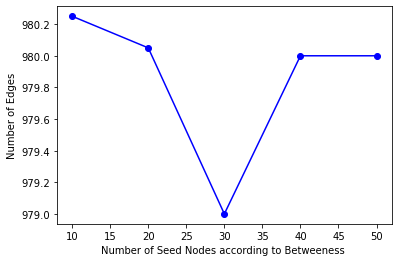

In [126]:
#betweenness_centrality
betweenDict = nx.betweenness_centrality(G)
decBetweennessDict = {k: v for k,v in sorted(betweenDict.items(), key = lambda v:v[1], reverse = True)}
# print(decBetweennessDict)
keysB = []
valsB = []
finalB_val = []
for i in decBetweennessDict.keys():
    keysB.append(i)
for j in decBetweennessDict.values():
    valsB.append(j)


def BCcal(K):
    decendingBC_list = keysB[0: K]
    print("Best ",len(decendingBC_list)," are: ", decendingBC_list)
    lenBCList=[]
    tempBCList=[]
    for i in range(20):
        tempBCList= ic(H,decendingBC_list,0.5)
        print(i,end="-->")
        lenBCList.append(len(tempBCList))
    print("\n",lenBCList)
    averageBC = sum(lenBCList)/len(lenBCList)
    return averageBC

BC1 = BCcal(10)
BC2 = BCcal(20)
BC3 = BCcal(30)
BC4 = BCcal(40)
BC5 = BCcal(50)

finalB_val.append(BC1)
finalB_val.append(BC2)
finalB_val.append(BC3)
finalB_val.append(BC4)
finalB_val.append(BC5)


plt.plot(kList,finalB_val, 'bo-')
plt.xlabel('Number of Seed Nodes according to Betweeness ')
plt.ylabel('Number of Edges')
plt.show()

C:\Users\Arijit Kundu\AppData\Local\Temp\ipykernel_6172\1946808737.py:2: DeprecationWarning: networkx.pagerank_numpy is deprecated and will be removed in NetworkX 3.0, use networkx.pagerank instead.
  page_rank = nx.pagerank_numpy(H)


Best  10  are:  ['160', '121', '82', '107', '86', '62', '5', '13', '166', '434']
0-->1-->2-->3-->4-->5-->6-->7-->8-->9-->10-->11-->12-->13-->14-->15-->16-->17-->18-->19-->
 [914, 949, 968, 975, 978, 980, 981, 982, 983, 984, 984, 985, 985, 986, 986, 986, 986, 986, 986, 986]
Best  20  are:  ['160', '121', '82', '107', '86', '62', '5', '13', '166', '434', '377', '64', '211', '183', '129', '249', '533', '84', '21', '128']
0-->1-->2-->3-->4-->5-->6-->7-->8-->9-->10-->11-->12-->13-->14-->15-->16-->17-->18-->19-->
 [918, 958, 973, 979, 982, 984, 985, 985, 986, 986, 986, 986, 986, 986, 986, 986, 986, 986, 986, 986]
Best  30  are:  ['160', '121', '82', '107', '86', '62', '5', '13', '166', '434', '377', '64', '211', '183', '129', '249', '533', '84', '21', '128', '106', '283', '105', '114', '87', '420', '333', '83', '142', '282']
0-->1-->2-->3-->4-->5-->6-->7-->8-->9-->10-->11-->12-->13-->14-->15-->16-->17-->18-->19-->
 [913, 958, 974, 982, 985, 986, 986, 986, 986, 986, 986, 986, 986, 986, 986, 9

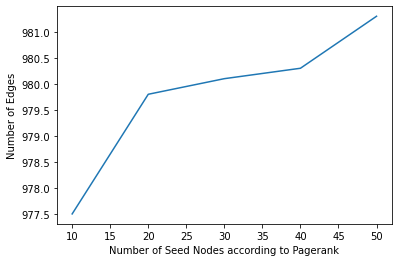

In [127]:
#pagerank_numpy
page_rank = nx.pagerank_numpy(H)
decendingPR = {k: v for k,v in sorted(page_rank.items(), key = lambda v:v[1], reverse = True)}
# print(decendingPG)

keysPR = []
valuesPR = []
for i in decendingPR.keys():
    keysPR.append(i)
for j in decendingPR.values():
    valuesPR.append(j)

finalPR=[]

def PRcal(K):
    decendingPR_list = keysPR[0: K]
    print("Best ",len(decendingPR_list)," are: ", decendingPR_list)
    lenPRList=[]
    tempPRList=[]
    for i in range(20):
        tempPRList= ic(H,decendingPR_list,0.5)
        print(i,end="-->")
        lenPRList.append(len(tempPRList))
    print("\n",lenPRList)
    averagePR = sum(lenPRList)/len(lenPRList)
    return averagePR

PR1 = PRcal(10)
PR2 = PRcal(20)
PR3 = PRcal(30)
PR4 = PRcal(40)
PR5 = PRcal(50)

finalPR.append(PR1)
finalPR.append(PR2)
finalPR.append(PR3)
finalPR.append(PR4)
finalPR.append(PR5)

plt.plot(kList,finalPR)
plt.xlabel('Number of Seed Nodes according to Pagerank')
plt.ylabel('Number of Edges')
plt.show()

Best  10  are:  ['82', '121', '107', '62', '160', '249', '434', '128', '129', '114']
0-->1-->2-->3-->4-->5-->6-->7-->8-->9-->10-->11-->12-->13-->14-->15-->16-->17-->18-->19-->
 [914, 958, 974, 979, 982, 985, 985, 986, 986, 986, 986, 986, 986, 986, 986, 986, 986, 986, 986, 986]
Best  20  are:  ['82', '121', '107', '62', '160', '249', '434', '128', '129', '114', '183', '87', '105', '166', '212', '21', '83', '106', '283', '81']
0-->1-->2-->3-->4-->5-->6-->7-->8-->9-->10-->11-->12-->13-->14-->15-->16-->17-->18-->19-->
 [920, 962, 972, 981, 982, 984, 985, 986, 986, 986, 986, 986, 986, 986, 986, 986, 986, 986, 986, 986]
Best  30  are:  ['82', '121', '107', '62', '160', '249', '434', '128', '129', '114', '183', '87', '105', '166', '212', '21', '83', '106', '283', '81', '86', '142', '169', '256', '115', '211', '333', '64', '405', '282']
0-->1-->2-->3-->4-->5-->6-->7-->8-->9-->10-->11-->12-->13-->14-->15-->16-->17-->18-->19-->
 [918, 957, 975, 979, 983, 983, 985, 986, 986, 986, 986, 986, 986, 9

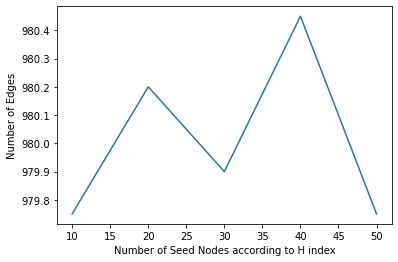

In [128]:
#H-index
HindexDegree = {}
decHindexDegree = {}
for nodes in G.nodes():
    HindexDegree[nodes] = Node_H_index(nodes)
# print(ExtendedDegree)
decHindexDegree = {k: v for k,v in sorted(HindexDegree.items(), key = lambda v:v[1], reverse = True)}
# print(decExtended)

keysH = []
valuesH = []
for i in decHindexDegree.keys():
    keysH.append(i)
for j in decHindexDegree.values():
    valuesH.append(j)
finalH=[]

def Hcal(K):
    decHindexDegree = keysH[0: K]
    print("Best ",len(decHindexDegree)," are: ", decHindexDegree)
    lenHList=[]
    tempHList=[]
    for i in range(20):
        tempHList= ic(H,decHindexDegree,0.5)
        print(i,end="-->")
        lenHList.append(len(tempHList))
    print("\n",lenHList)
    averageH = sum(lenHList)/len(lenHList)
    return averageH

H1 = Hcal(10)
H2 = Hcal(20)
H3 = Hcal(30)
H4 = Hcal(40)
H5 = Hcal(50)

finalH.append(H1)
finalH.append(H2)
finalH.append(H3)
finalH.append(H4)
finalH.append(H5)

plt.plot(kList,finalH)
plt.xlabel('Number of Seed Nodes according to H index')
plt.ylabel('Number of Edges')
plt.show()

Best  10  are:  ['160', '121', '82', '107', '62', '434', '86', '249', '183', '166']
0-->1-->2-->3-->4-->5-->6-->7-->8-->9-->10-->11-->12-->13-->14-->15-->16-->17-->18-->19-->
 [922, 958, 971, 978, 984, 984, 986, 986, 986, 986, 986, 986, 986, 986, 986, 986, 986, 986, 986, 986]
Best  20  are:  ['160', '121', '82', '107', '62', '434', '86', '249', '183', '166', '129', '105', '128', '114', '283', '13', '64', '87', '211', '142']
0-->1-->2-->3-->4-->5-->6-->7-->8-->9-->10-->11-->12-->13-->14-->15-->16-->17-->18-->19-->
 [921, 956, 970, 981, 982, 985, 985, 986, 986, 986, 986, 986, 986, 986, 986, 986, 986, 986, 986, 986]
Best  30  are:  ['160', '121', '82', '107', '62', '434', '86', '249', '183', '166', '129', '105', '128', '114', '283', '13', '64', '87', '211', '142', '83', '106', '533', '256', '115', '282', '21', '424', '333', '212']
0-->1-->2-->3-->4-->5-->6-->7-->8-->9-->10-->11-->12-->13-->14-->15-->16-->17-->18-->19-->
 [925, 961, 974, 981, 984, 984, 985, 985, 986, 986, 986, 986, 986, 98

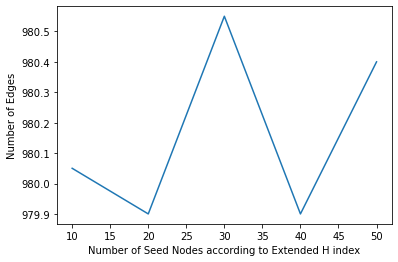

In [129]:
#Extended H Index
ExtendedHDegree = {}
decExtendedH = {}
for nodes in G.nodes():
    ExtendedHDegree[nodes] = Extended_H_index(nodes)
decExtendedH = {k: v for k,v in sorted(ExtendedHDegree.items(), key = lambda v:v[1], reverse = True)}

keysEH = []
valuesEH = []
for i in decExtendedH.keys():
    keysEH.append(i)
for j in decExtendedH.values():
    valuesEH.append(j)
finalEH=[]

def EHcal(K):
    decExtendedH = keysEH[0: K]
    print("Best ",len(decExtendedH)," are: ", decExtendedH)
    lenEHList=[]
    tempEHList=[]
    for i in range(20):
        tempEHList= ic(H,decExtendedH,0.5)
        print(i,end="-->")
        lenEHList.append(len(tempEHList))
    print("\n",lenEHList)
    averageEH = sum(lenEHList)/len(lenEHList)
    return averageEH

EH1 = EHcal(10)
EH2 = EHcal(20)
EH3 = EHcal(30)
EH4 = EHcal(40)
EH5 = EHcal(50)

finalEH.append(EH1)
finalEH.append(EH2)
finalEH.append(EH3)
finalEH.append(EH4)
finalEH.append(EH5)

plt.plot(kList,finalEH)
plt.xlabel('Number of Seed Nodes according to Extended H index')
plt.ylabel('Number of Edges')
plt.show()


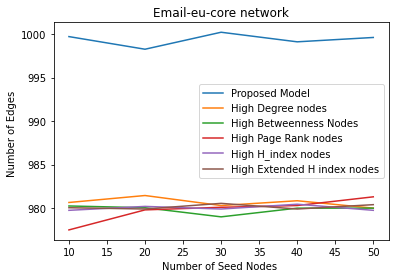

In [130]:
plt.plot(kList,valueList,label='Proposed Model ')
plt.plot(kList,finalDlist, label='High Degree nodes')
plt.plot(kList,finalB_val, label='High Betweenness Nodes')
plt.plot(kList,finalPR, label='High Page Rank nodes')
plt.plot(kList,finalH, label='High H_index nodes')
plt.plot(kList,finalEH, label='High Extended H index nodes')


plt.xlabel('Number of Seed Nodes ')
plt.ylabel('Number of Edges ')
plt.title('Email-eu-core network')
plt.legend()
plt.show()